Имеется файл с временной статистикой работы асессоров над однотипным заданием. 

Формат файла: login tid Microtasks assigned_ts tclosed_ts 

Пояснение к формату: login — логин асессора; 
                     tid — id оцениваемого задания (task id); 
                     Microtasks – количество микрозаданий в одном задании; 
                     assigned_ts — время резервирования системой задания для асессора; 
                     closed_ts — точное время завершения работы над заданием; 
                     
                     разделитель — табуляция \t. 
                     
Задание может состоять из одного или несколько микрозаданий. Время резервирования задания (assigned_ts) указывает на тот момент, когда система назначила определенного асессора исполнителем этого задания. Этот момент может совпадать с временем начала работы асессора над заданием, а может и не совпадать (асессор может отойти выпить чаю, а потом приступить к заданию, асессор может выполнять предыдущее задание, в то время как за ним зарезервированы новые). 

Предположим, что асессор за 30 секунд своего рабочего времени получает N рублей. Какую оплату вы считаете справедливой для выполнения асессором одного микрозадания из этого файла? Опишите подробно все этапы вашего решения.

для выполнения асессором одного микрозадания

# Следовательно, нам не нужно давать оценку, ориентируясь на время

# Нужно взять данные, отбросить лишнее, рассчитать оптимальное время выполнения 1 микротаски и выразить данное время через N


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data_task4_old.txt', sep='\t', index_col=0)

In [7]:
df.head(5)

,tid,Microtasks,assigned_ts,closed_ts
login,,,,
login0,190563850.0,4.0,2017-04-20 12:09:39,2017-04-20 13:13:01
login0,190561754.0,1.0,2017-04-20 12:10:30,2017-04-20 12:28:29
login0,190565906.0,4.0,2017-04-20 12:21:31,2017-04-20 13:30:10
login0,190560246.0,1.0,2017-04-20 12:28:30,2017-04-20 13:13:56
login0,190562168.0,2.0,2017-04-20 12:28:42,2017-04-20 13:14:50


Предварительный план:

1. Проверить гипотезу о том, что для каждому tid соответствует лишь одна запись о выполнении

Если гипотеза не верна, то сгруппировать по tid 
Если гипотеза верна то отобрать тестовый набор данных

Исходя из условий возможным вариантом решения считаю:
1. Рассчитать время, потраченное на каждую таску, построить график, оценить полученные данные

Предположительно, показатель времени, затраченного на задание, имеет нормальное распределение
Если это так, то нам следует рассчитать порог в 3 стандартных отконения, чтобы отбросить экстремальные значения

2. Рассчитать время, потраченное на каждую микротаску для каждого выполнения, построить график, оценить

In [4]:
print(len(df))

701827


In [13]:
test = df.groupby('tid')

In [14]:
%%time

print(len(test))

635044
Wall time: 8.6 s


In [15]:
task = df.groupby('Microtasks')

In [16]:
%%time

print(len(task))

50
Wall time: 73 ms


Далее вычислим продолжительность выполнения каждого отдельного задания 

In [32]:
df['time'] = np.nan

In [40]:
df['time'] = pd.to_datetime(df['closed_ts']) - pd.to_datetime(df['assigned_ts'])

In [46]:
df.tail(5)

,tid,Microtasks,assigned_ts,closed_ts,time
login,,,,,
login766,195656026.0,1.0,2017-05-15 15:53:27,2017-05-15 16:16:56,00:23:29
login766,195656174.0,1.0,2017-05-15 15:53:33,2017-05-15 16:21:53,00:28:20
login766,195656466.0,1.0,2017-05-15 15:53:38,2017-05-15 16:23:41,00:30:03
login766,195656336.0,3.0,2017-05-15 15:54:18,2017-05-15 16:32:11,00:37:53
login766,195656078.0,2.0,2017-05-15 15:54:59,2017-05-15 16:17:32,00:22:33


In [143]:
df.sort_values(by = ['time'], ascending=False).head(5)

,tid,Microtasks,assigned_ts,closed_ts,time
login,,,,,
login657,185714006.0,7.0,2017-04-27 06:33:43,2017-05-20 22:06:41,23 days 15:32:58
login657,185714006.0,7.0,2017-04-27 06:33:43,2017-05-20 22:06:41,23 days 15:32:58
login300,185713854.0,17.0,2017-04-29 06:33:09,2017-05-22 16:21:41,23 days 09:48:32
login300,185713854.0,17.0,2017-04-29 06:33:09,2017-05-22 16:21:41,23 days 09:48:32
login300,189300182.0,13.0,2017-04-30 06:32:42,2017-05-22 16:23:44,22 days 09:51:02


Как видно из отсортированных данных, изучаемый датасет имеет повторения, от которых следует избавиться

In [57]:
dfclean = df.drop_duplicates()
print(len(dfclean))

680037


In [58]:
dfclean.sort_values(by = ['time'], ascending=False).head(5)

,tid,Microtasks,assigned_ts,closed_ts,time
login,,,,,
login657,185714006.0,7.0,2017-04-27 06:33:43,2017-05-20 22:06:41,23 days 15:32:58
login300,185713854.0,17.0,2017-04-29 06:33:09,2017-05-22 16:21:41,23 days 09:48:32
login300,189300182.0,13.0,2017-04-30 06:32:42,2017-05-22 16:23:44,22 days 09:51:02
login300,185713868.0,15.0,2017-05-03 06:32:56,2017-05-22 16:26:19,19 days 09:53:23
login657,195642338.0,1.0,2017-05-17 06:41:20,2017-05-29 17:03:56,12 days 10:22:36


In [77]:
dfclean = dfclean.copy()

Далее вычислим среднее время, затраченное на 1 микротаску

In [80]:
dfclean['timeonetask'] = dfclean['time'] / dfclean['Microtasks']

In [84]:
dfclean.sort_values(by = ['time'], ascending=False).head(5)

,tid,Microtasks,assigned_ts,closed_ts,time,timeonetask
login,,,,,,
login657,185714006.0,7.0,2017-04-27 06:33:43,2017-05-20 22:06:41,23 days 15:32:58,3 days 09:04:42.571428
login300,185713854.0,17.0,2017-04-29 06:33:09,2017-05-22 16:21:41,23 days 09:48:32,1 days 09:02:51.294117
login300,189300182.0,13.0,2017-04-30 06:32:42,2017-05-22 16:23:44,22 days 09:51:02,1 days 17:22:23.230769
login300,185713868.0,15.0,2017-05-03 06:32:56,2017-05-22 16:26:19,19 days 09:53:23,1 days 07:03:33.533333
login657,195642338.0,1.0,2017-05-17 06:41:20,2017-05-29 17:03:56,12 days 10:22:36,12 days 10:22:36


In [137]:
dfclean.sort_values(by = ['time'], ascending=True).head(5)

,tid,Microtasks,assigned_ts,closed_ts,time,timeonetask
login,,,,,,
login585,197340894.0,1.0,2017-05-24 16:13:06,2017-05-24 16:00:57,-1 days +23:47:51,-1 days +23:47:51
login699,195930544.0,1.0,2017-05-16 14:14:37,2017-05-16 14:14:40,00:00:03,00:00:03
login699,195931178.0,1.0,2017-05-16 14:14:29,2017-05-16 14:14:32,00:00:03,00:00:03
login699,195931108.0,1.0,2017-05-16 14:15:31,2017-05-16 14:15:34,00:00:03,00:00:03
login699,195930258.0,1.0,2017-05-16 14:14:42,2017-05-16 14:14:45,00:00:03,00:00:03


Как видно, исследуемы набор данных содержит отрицательные значения времени выполнения. Исходя из начального условия можно утверждать, что подобный случай невозможен и является результатом ошибки. Следовательно, его следует удалить из набора данных.

In [139]:
dfclean = dfclean[dfclean.time != '-1 days +23:47:51']

In [141]:
dfclean.sort_values(by = ['time'], ascending=True).head(5)

,tid,Microtasks,assigned_ts,closed_ts,time,timeonetask
login,,,,,,
login699,195930544.0,1.0,2017-05-16 14:14:37,2017-05-16 14:14:40,00:00:03,00:00:03
login699,195931108.0,1.0,2017-05-16 14:15:31,2017-05-16 14:15:34,00:00:03,00:00:03
login699,195931178.0,1.0,2017-05-16 14:14:29,2017-05-16 14:14:32,00:00:03,00:00:03
login699,195930258.0,1.0,2017-05-16 14:14:42,2017-05-16 14:14:45,00:00:03,00:00:03
login699,195931574.0,1.0,2017-05-16 14:15:41,2017-05-16 14:15:45,00:00:04,00:00:04


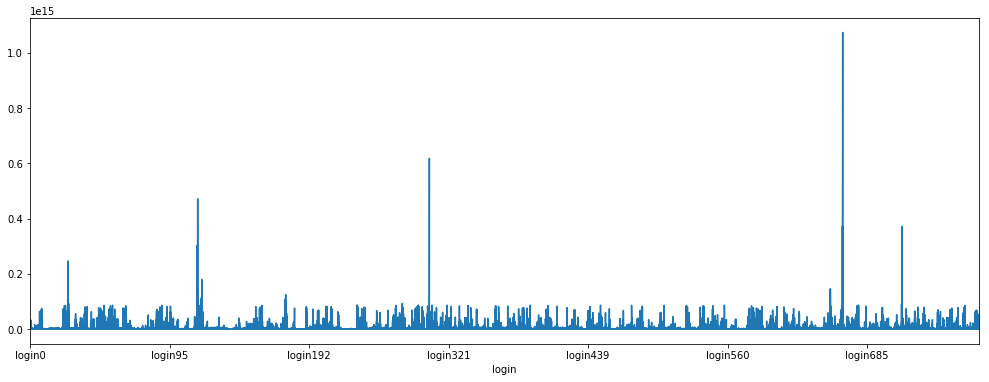

In [144]:
dfclean.timeonetask.plot(figsize = (17, 6))

In [145]:
test = dfclean.groupby('timeonetask')

In [ ]:
prin

In [117]:
dfclean.timeonetask.dt.total_seconds()

login
login0       950.500000
login0      1079.000000
login0      1029.750000
login0      2726.000000
login0      1384.000000
               ...     
login766    1409.000000
login766    1700.000000
login766    1803.000000
login766     757.666667
login766     676.500000
Name: timeonetask, Length: 680037, dtype: float64

In [136]:
dfclean.timeonetask.dt.total_seconds().min()

-729.0

count    6.800370e+05
mean     5.337958e+02
std      4.344154e+03
min     -7.290000e+02
25%      3.700000e+01
50%      7.500000e+01
75%      1.822000e+02
max      1.074156e+06
Name: timeonetask, dtype: float64

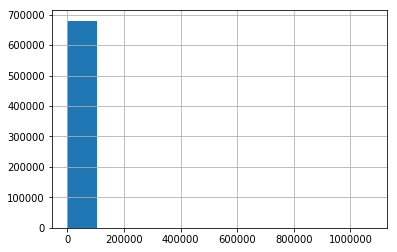

In [135]:
opisat_stat = dfclean.timeonetask.dt.total_seconds().describe()
dfclean.timeonetask.dt.total_seconds().hist()
opisat_stat